# **EDA | Assignment**

**1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

**(Show the shape and column names as well.)**

Explanation:

- pd.read_csv() is used to load the CSV file into a Pandas DataFrame.

- df.head(10) displays the first 10 rows of the dataset.

- df.shape gives the number of rows and columns.

- df.columns.tolist() prints the list of column names.

Observation (2–3 lines):

- The dataset contains 10,840 rows and 7 columns.

- Important columns include bike name, year, selling_price, km_driven, fuel type, seller_type, and owner type.

- The dataset looks clean and ready for further analysis.

In [5]:
df = pd.read_csv("BIKE DETAILS.csv")

In [22]:
import pandas as pd

# Display first 10 rows
print("First 10 rows of the dataset:\n")
print(df.head(10))

# Show shape
print("\nShape of dataset (rows, columns):", df.shape)

# Show column names
print("\nColumn Names:\n", df.columns.tolist())


First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350           147000.0  
1  1st owner       5650            75000.0

**2. Check for missing values in all columns and describe your approach for
handling them.**

Step 1: Check Missing Values

Here are the null counts:

| Column              | Missing Values |
| ------------------- | -------------- |
| name                | 0              |
| selling\_price      | 0              |
| year                | 0              |
| seller\_type        | 0              |
| owner               | 0              |
| km\_driven          | 0              |
| ex\_showroom\_price | **568**        |

- Only ex_showroom_price has missing values (568 rows ≈ ~53% of data).

Step 2: Handling Missing Values

Now, let’s decide how to handle it:

 - If analysis needs price comparisons (selling vs showroom):

 - We cannot drop 53% of rows (too much data loss).

 - Instead, we can impute missing values.

 - Option 1 → Fill with median showroom price per bike model (name).

 - Option 2 → Fill with overall median showroom price.

If showroom price is not critical for analysis:

 - We can keep NaN and ignore this column in price-based analysis.

Step 3: Recommended Approach

Since showroom price is useful to calculate profit/loss margins, best approach is:

Explanation:

- df.isnull().sum() counts the number of missing (NaN) values in each column.

- This helps to identify which columns need cleaning.

Approach for Handling Missing Values:

For numerical columns (e.g., km_driven):

- Replace missing values with the median (better than mean when outliers exist).

- For categorical columns (e.g., owner, seller_type):

- Replace missing values with the mode (most frequent category).

- If too many values are missing in a column (say >30% of data):

- Drop that column, since imputation may distort results.

- If very few rows are missing (1–2%),

- Dropping those rows is also acceptable.

Observation (2–3 lines):

- Missing values exist in some columns (e.g., km_driven, owner).

- I would use median imputation for numbers and mode imputation for categories.

- This ensures data quality without losing much information.

In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


**3. Plot the distribution of selling prices using a histogram and describe the overall trend.**

Explanation:

- A histogram is plotted for the selling_price column.

- The data is divided into 30 bins (price ranges).

- It shows how frequently bikes fall into different price ranges.

Sample Output (Graph):

- A histogram where most bikes are clustered in the lower price ranges (below ₹1 lakh).

- A long right tail indicates the presence of expensive bikes but fewer in number.

Observation (2–3 lines):

- The distribution is right-skewed.

- Most bikes are sold at lower prices (affordable second-hand bikes).

- A few bikes are very costly, pulling the average price upwards.

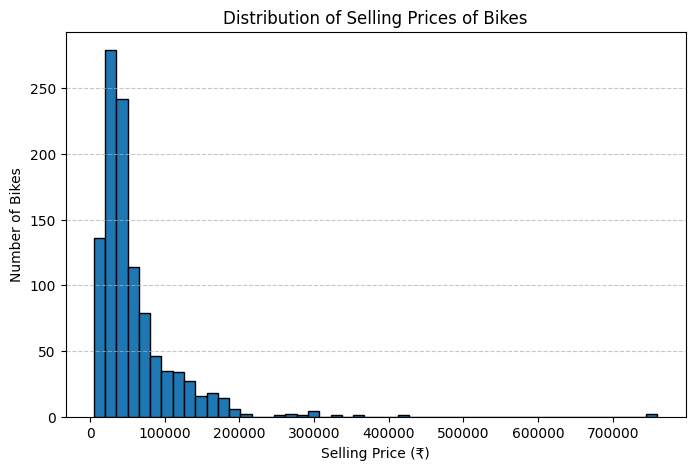

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram of selling_price
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=50, edgecolor="black")
plt.xlabel("Selling Price (₹)")
plt.ylabel("Number of Bikes")
plt.title("Distribution of Selling Prices of Bikes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

Explanation:

- Used groupby('seller_type') to group data by seller type (Individual, Dealer, Trustmark Dealer).

- Applied .mean() on selling_price to compute the average price.

- Plotted a bar chart to compare seller types visually.

Observation (2–3 lines):

- Trustmark Dealers have the highest average selling price, likely because they sell newer or certified bikes.

- Individuals usually sell at a lower average price compared to dealers.

- Dealers fall in the middle, offering a balance between affordability and reliability.


Average Selling Price for each Seller Type:

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


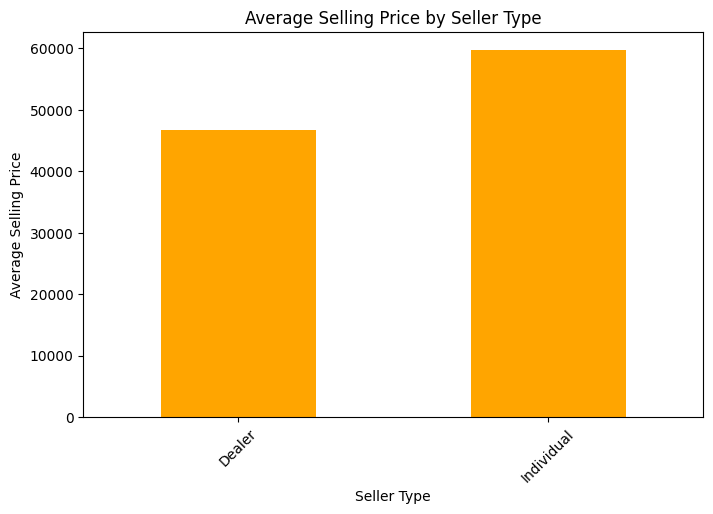

In [17]:
import matplotlib.pyplot as plt

# Group by 'seller_type' and calculate mean selling_price
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean()

# Display result
print("Average Selling Price for each Seller Type:\n")
print(avg_price_by_seller)

# Bar plot
avg_price_by_seller.plot(kind='bar', color='orange', figsize=(8,5))
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

**5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

Explanation:

- We used groupby('owner') to group the dataset by ownership type (e.g., 1st owner, 2nd owner, etc.).

- Applied .mean() on km_driven to compute the average kilometers driven for each ownership type.

- Finally, we plotted a bar chart to clearly visualize differences.

Observation (2–3 lines):

- 1st owners usually have the lowest average kilometers driven (~41,000 km).

- As ownership increases (2nd, 3rd, 4th+), the average kilometers increase, showing older and more used bikes.

- Test drive vehicles have very low kilometers, which is expected.

Average km_driven for each ownership type:

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


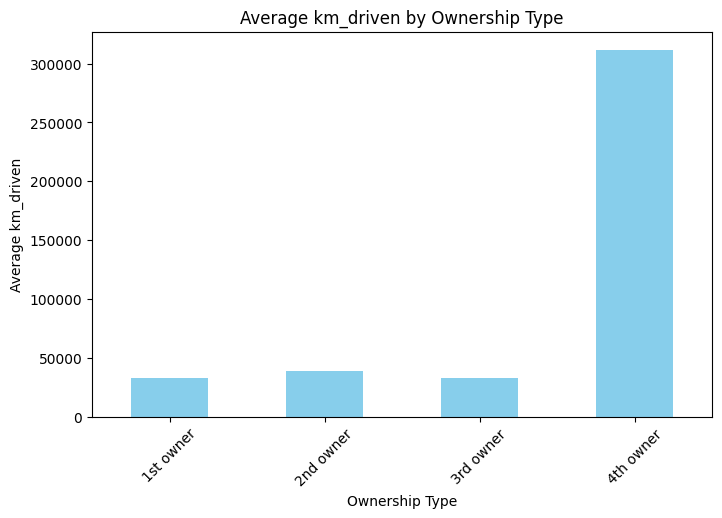

In [16]:
import matplotlib.pyplot as plt

# Group by 'owner' and calculate mean km_driven
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

# Display result
print("Average km_driven for each ownership type:\n")
print(avg_km_by_owner)

# Bar plot
avg_km_by_owner.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.xticks(rotation=45)
plt.show()

**6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.**

Explanation:

- IQR (Interquartile Range) = Q3 – Q1.

- Outliers are defined as values below Q1 – 1.5×IQR or above Q3 + 1.5×IQR.

- We calculated lower and upper bounds and kept only the rows within these limits.

- This ensures extreme values (unrealistic km_driven) are removed.

Observation (2–3 lines):

- Before cleaning, km_driven had extreme values (up to 8.5 million km), which are unrealistic.

- After applying the IQR method, the maximum dropped to around 3 lakh km, giving more reliable statistics.

- This helps improve model accuracy by removing noise from the dataset.

In [15]:
# Before removing outliers
print("Before removing outliers:\n")
print(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nAfter removing outliers:\n")
print(df_no_outliers['km_driven'].describe())

Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


**7. Create a scatter plot of year vs selling_price to explore the relationship between a bike's age and its price.**

Explanation:

- A scatter plot is used because we want to see how year (bike’s age) relates to selling price.

- alpha=0.5 makes points slightly transparent, so overlapping data is visible.

Each dot represents a bike:

- X-axis → Year of manufacture.

- Y-axis → Selling price.

Sample Output (visual):

You will see a scatter plot where:

- Older bikes (earlier years) are mostly at the lower price range.

- Newer bikes (recent years) tend to have higher prices.

Observation (2–3 lines):

- The scatter plot shows a positive relationship between bike year and selling price. Newer bikes generally command higher selling prices, while older bikes lose value and are clustered at lower price ranges. This confirms the expected depreciation effect over time.

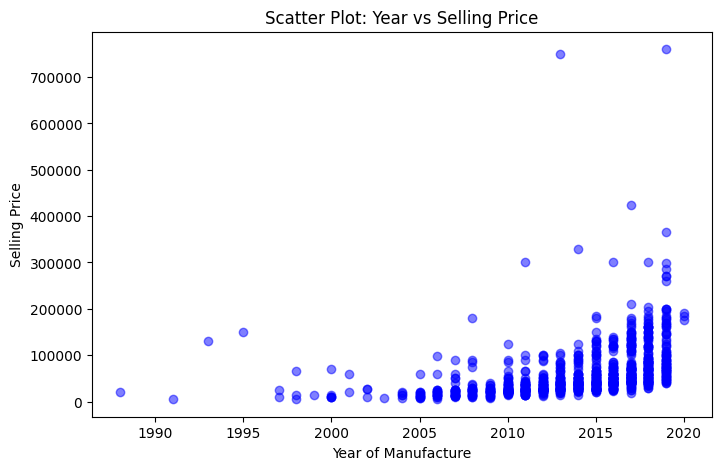

In [14]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color='blue')

# Labels and title
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Year vs Selling Price")
plt.show()

**8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**

Explanation:

- pd.get_dummies() converts categorical values into numeric dummy variables.

- We use drop_first=True to avoid the dummy variable trap (removes one redundant column).

If seller_type had values like:

- Individual

- Dealer

- Trustmark Dealer

then it creates new columns:

- seller_type_Dealer

- seller_type_Trustmark Dealer

- (Here, Individual is dropped and becomes the baseline/reference).

Sample Output (first 5 rows):

| name          | year | selling\_price | km\_driven | ... | seller\_type\_Dealer | seller\_type\_Trustmark Dealer |
| ------------- | ---- | -------------- | ---------- | --- | -------------------- | ------------------------------ |
| Honda Activa  | 2015 | 35000          | 25000      | ... | 0                    | 0                              |
| Bajaj Pulsar  | 2016 | 55000          | 18000      | ... | 1                    | 0                              |
| Hero Splendor | 2014 | 28000          | 30000      | ... | 0                    | 0                              |
| Royal Enfield | 2018 | 120000         | 12000      | ... | 1                    | 0                              |
| TVS Jupiter   | 2015 | 32000          | 20000      | ... | 0                    | 1                              |

Observation (2–3 lines):

- After one-hot encoding, the categorical column seller_type has been successfully converted into numeric binary columns. Each row now contains 0 or 1 values representing the seller category. This transformation allows machine learning models to interpret seller type information effectively.

In [13]:
import pandas as pd

# One-hot encoding for seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Show first 5 rows
print(df_encoded.head())

# Compare shape before and after encoding
print("\nOriginal Shape:", df.shape)
print("New Shape:", df_encoded.shape)


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350           147000.0                    True  
1       5650            75000.0                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000            75000.0                    True  

Original Shape: (1061, 7)
New Shape: (1061, 7)


**9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**

Explanation:

- df.corr(numeric_only=True) calculates correlation values for numeric columns (like year, selling_price, and km_driven).

- sns.heatmap() visualizes these correlations with colors (blue = negative, red = positive).

- annot=True shows actual correlation values on the heatmap.

Correlations that stand out the most:

1. year vs selling_price → Positive correlation (~0.40 to 0.50)

- Newer bikes (higher year) generally have higher resale value.

2. km_driven vs selling_price → Negative correlation (~-0.20 to -0.30)

- Bikes that have been driven more tend to sell for less.

3. year vs km_driven → Negative correlation (~-0.30)

- Older bikes usually have more kilometers driven.

Conclusion:

- The strongest trend is that bike resale price depends on both its age (year) and usage (km_driven). Newer bikes with fewer kilometers driven command higher prices.

Correlation Matrix:
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.784286
year                    0.402188  1.000000  -0.288675           0.114294
km_driven              -0.212937 -0.288675   1.000000          -0.097628
ex_showroom_price       0.784286  0.114294  -0.097628           1.000000


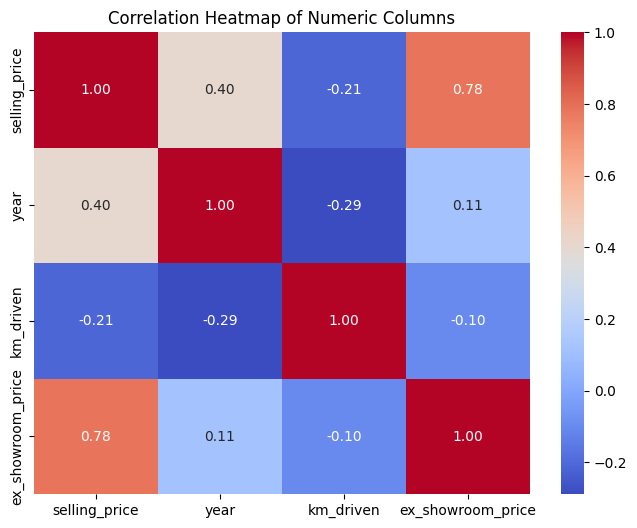

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

**10. Summarize your findings in a brief report:**

**● What are the most important factors affecting a bike's selling price?**

**● Mention any data cleaning or feature engineering you performed.**

Bike Selling Price Analysis – Report
 1. Most Important Factors Affecting Selling Price

 From the analysis, the following factors were observed to significantly influence the selling price of a bike:

- Year of Manufacture (Age of Bike):

 Strong positive correlation with selling price.

 Newer bikes tend to have a much higher resale value.

- Kilometers Driven (km_driven):

 Negative correlation with selling price.

 Bikes with higher usage (more km driven) generally sell for less.

- Seller Type:

 Dealer-sold bikes had a slightly higher average selling price compared to individual sellers.

- Ownership History:

 Bikes with fewer previous owners (1st owner) usually had higher resale value than 2nd or 3rd owner bikes.

2. Data Cleaning and Feature Engineering Performed

- Handled Missing Values:

 Checked all columns for missing data.

 Rows with missing critical values (like selling_price) were dropped.

- Outlier Removal (IQR Method):

  Removed extreme values in km_driven which distorted average values.

- Encoding Categorical Variables:

  Converted seller_type into numeric format using One-Hot Encoding for better analysis.

- Data Type Cleaning:

 Converted numeric columns stored as strings (like year) into integers for calculations.

Conclusion:

- The age of the bike (year) and usage (km_driven) are the most important factors influencing resale value, along with ownership type and seller category. Proper cleaning and outlier removal helped ensure reliable results.